<a href="https://colab.research.google.com/github/JJungEEun/Optimization_of_DemandResponseBus_Routes/blob/main/%EC%A0%95%EB%A5%98%EC%9E%A5%EC%A0%91%EA%B7%BC%EC%84%B1%EB%B0%8F%EB%B6%84%ED%8F%AC%EC%A0%95%EB%8F%84%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
trans = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/인천광역시_가장 많이 이용하는 교통수단_20191231.csv",encoding='cp949')
s_pass = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/인천광역시_정류장별 이용승객 현황_20220430.csv", encoding='cp949')

### 권역별 버스 정류장 접근성 확인

In [ ]:
s_pass.head()

,권역,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수
0,중구,(구)국제여객터미널,35051.0,86,1550,7,1550,79,55
1,중구,(구)국제여객터미널,35052.0,2221,42,2178,42,43,75
2,미추홀구,(구)시민회관사거리,37319.0,7866,56698,7732,56698,134,2152
3,미추홀구,(구)시민회관사거리,37326.0,78529,16782,77529,16782,1000,3177
4,서구,(구)신현주공,42228.0,4540,5758,4347,5758,193,343


In [ ]:
s_pass['정류장수'] =  1
grouped_pass = s_pass.groupby(['권역'])['승차건수(총합계)','하차건수(총합계)','정류장수'].sum()
grouped_pass['승하차건수(총합계)'] = grouped_pass['승차건수(총합계)']+ grouped_pass['하차건수(총합계)']
grouped_pass['인원/정류장'] = grouped_pass['정류장수'] / (grouped_pass['승차건수(총합계)']+grouped_pass['하차건수(총합계)']) * 100
grouped_pass = grouped_pass.reset_index()

In [ ]:
grouped_pass

,권역,승차건수(총합계),하차건수(총합계),정류장수,승하차건수(총합계),인원/정류장
0,강화군,163607,122108,1292,285715,0.452199
1,계양구,1722215,1661255,438,3383470,0.012945
2,기타,52386,50074,64,102460,0.062463
3,남동구,3829012,3622042,729,7451054,0.009784
4,동구,543950,509472,150,1053422,0.014239
5,미추홀구,3993098,3732851,480,7725949,0.006213
6,부평구,3851037,3628202,656,7479239,0.008771
7,서구,2975903,2791122,950,5767025,0.016473
8,연수구,2144787,1981536,548,4126323,0.013281
9,옹진군,8287,7600,107,15887,0.673507


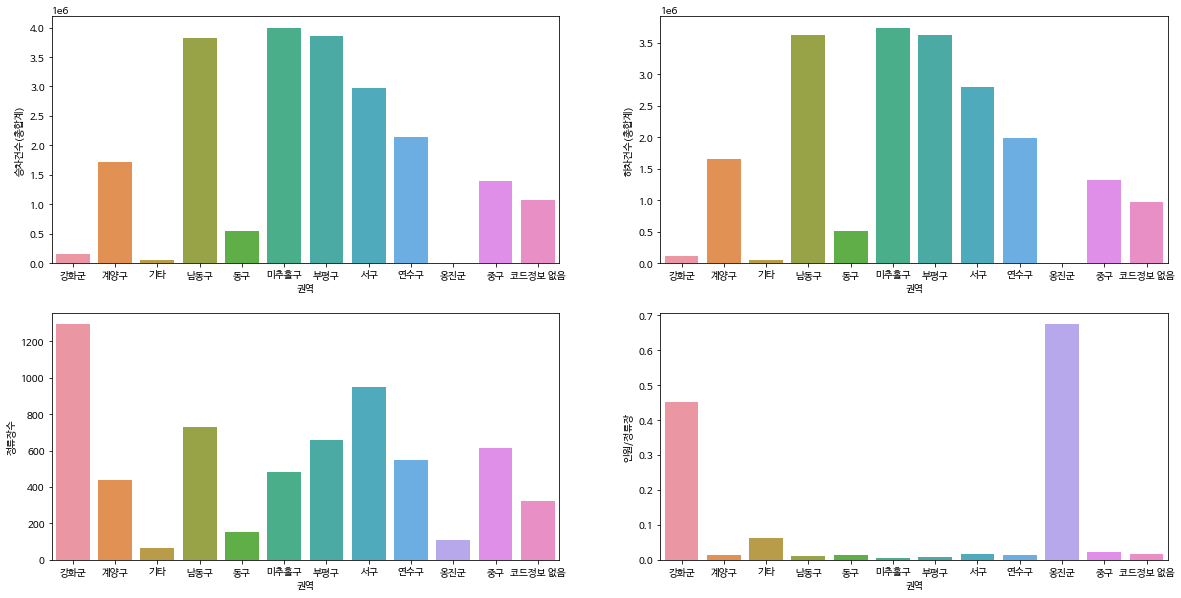

In [ ]:
col_n = 2 
row_n = 2 
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

col = ["승차건수(총합계)","하차건수(총합계)","정류장수","인원/정류장"]
for i,col in enumerate(grouped_pass[col]): 
  sns.barplot(x=grouped_pass["권역"], y=grouped_pass[col], ax=ax[int(i/col_n),int(i%col_n)])

### 중구 버스 정류장 접근성 확인

In [ ]:
s_pass_중구 = s_pass[s_pass['권역']=='중구']
s_pass_중구

,권역,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,정류장수
0,중구,(구)국제여객터미널,35051.0,86,1550,7,1550,79,55,1
1,중구,(구)국제여객터미널,35052.0,2221,42,2178,42,43,75,1
36,중구,8부두,35181.0,309,2891,267,2891,42,107,1
37,중구,8부두,35182.0,1674,2210,1620,2210,54,129,1
38,중구,CJ인천2공장,35591.0,163,3215,163,3215,0,113,1
...,...,...,...,...,...,...,...,...,...,...
6228,중구,화물터미널,35040.0,185,1,185,1,0,6,1
6230,중구,화성파크드림.스카이시티자이,35651.0,5799,1843,5717,1843,82,255,1
6231,중구,화성파크드림후문.한라비발디,35659.0,591,824,577,824,14,47,1
6331,중구,힐스테이트,35457.0,15180,9868,14960,9868,220,835,1


In [ ]:
s_pass_중구['정류소명'].unique()

array(['(구)국제여객터미널', '8부두', 'CJ인천2공장', 'GS칼텍스', 'KT인천공항지사', 'LH1단지',
       'LH49단지행복주택아파트', 'LH7단지', 'SKLPG충전사업소', 'SK주유소앞', 'SK충전소',
       'e편한세상1차(정문)', 'e편한세상영종오션하임', 'e편한세상영종하늘도시', '가재우물터', '갑문',
       '개항동 어울터', '갤러리84입구', '거잠포선착장', '거잠포회센터', '거잠포회센터(미정차)', '경남아파트',
       '고염나무골', '공군8547부대앞', '공항고등학교', '공항고속도로진입(미정차)', '공항교회앞',
       '공항신도시(메디컬사거리)', '공항중학교', '공항초등학교', '공항회센터', '관창마을', '광명항',
       '광명항(샘꾸미)', '교육연수원', '구름다리', '구정슈퍼앞', '국립인천공항검역소', '국제업무단지(공항청사)',
       '그린나래지하차도', '근대문화거리입구', '금산경로당', '금호베스트빌1단지.영종도서관',
       '금호베스트빌2단지.영종도서관', '금호어울림', '금호어울림1차', '금호어울림2차', '금홍염전',
       '긴마루교회입구', '김소골', '나룻개', '나룻개입구', '남뒤3거리', '남성네고개', '남항유어선부두',
       '넙디', '넙디마을입구', '논골', '논골경로당 입구', '높은마을입구', '늘목', '늘목마을입구',
       '대양자동차학원', '대한제당', '대흥식당', '덕교3거리', '덕교동', '덕교삼거리', '도원동행정복지센터',
       '도원동행정복지센터(앞)', '도원역(인천축구전용경기장)', '돌산밑', '돌팍재삼거리', '돌팍재한뿌리', '동강리',
       '동보노빌리티', '동인천', '동인천(우리은행앞)', '동인천동행정복지센터', '동인천역', '동일아파트',
       '둥개마을오거리', '둥깨마을입구(세븐일레븐)', '둥깨마을입구

In [ ]:
s = s_pass_중구.groupby(['정류소명'])['승차건수(총합계)','하차건수(총합계)','정류장수'].sum()
s['승하차건수(총합계)'] = s['승차건수(총합계)']+ s['하차건수(총합계)']
s['인원/정류장'] = s['정류장수'] / (s['승차건수(총합계)']+s['하차건수(총합계)']) * 100
# s = s.reset_index()
s

,승차건수(총합계),하차건수(총합계),정류장수,승하차건수(총합계),인원/정류장
정류소명,,,,,
(구)국제여객터미널,2307,1592,2,3899,0.051295
8부두,1983,5101,2,7084,0.028233
CJ인천2공장,2608,3287,2,5895,0.033927
GS칼텍스,543,2333,2,2876,0.069541
KT인천공항지사,8187,3059,2,11246,0.017784
...,...,...,...,...,...
홍익자원,1452,1514,2,2966,0.067431
화물터미널,185,254,2,439,0.455581
화성파크드림.스카이시티자이,5799,1843,1,7642,0.013086


영종도가 아닌 중구 지역 포함 

In [ ]:
s['인원/정류장'].sort_values(ascending=False).head(10)

정류소명
거잠포회센터(미정차)       100.000000
공항고속도로진입(미정차)      50.000000
인하국제의료센터           33.333333
마시란해변승마장           28.571429
운서SKVIEW 스카이시티     25.000000
광명항(샘꾸미)           16.666667
중앙방앗간              14.285714
영종소방서              11.111111
인천시교육청 교육연수원        9.090909
마시란해변(전주집)          9.090909
Name: 인원/정류장, dtype: float64

In [ ]:
s[20:26]

,정류소명,승차건수(총합계),하차건수(총합계),정류장수,승하차건수(총합계),인원/정류장
20,거잠포회센터(미정차),1,0,1,1,100.000000
21,경남아파트,8347,4911,2,13258,0.015085
22,고염나무골,188,144,2,332,0.602410
23,공군8547부대앞,13,167,2,180,1.111111
24,공항고등학교,3183,416,1,3599,0.027785
25,공항고속도로진입(미정차),1,1,1,2,50.000000


In [ ]:
s['승하차건수(총합계)'].sort_values(ascending=False).head(20)

정류소명
동인천역            365707
신포시장            171602
인천역(차이나타운)      120566
동인천              66764
숭의역(2번출구)        59234
영종역              57845
운서역              56210
신흥시장             51142
중구노인복지회관         45710
인천공항T1(3층7번)     43703
인천공항T1(1층2A)     43614
월미도              39855
인하대병원            37278
힐스테이트            36090
인천공항T1(3층2번)     34982
연안초등학교           34299
항운아파트            31988
한라비발디            30121
배다리              28383
송도중학교            28190
Name: 승하차건수(총합계), dtype: int64

아이모드의 운영지인 영종도 정류장만 추출

In [ ]:
bus_yj = pd.read_csv("/content/drive/MyDrive/2022/공모전_아이모드 최적화 방안/data/중구버스2.csv",encoding='UTF8')
bus_yj 

,권역,정류소명,정류소ID,승차건수(총합계),하차건수(총합계),승차건수(카드),하차건수(카드),승차건수(현금),일평균 승하차건수,정류장수
0,중구,(구)국제여객터미널,35051,86,1550,7,1550,79,55,1
1,중구,(구)국제여객터미널,35052,2221,42,2178,42,43,75,1
2,중구,KT인천공항지사,35095,324,84,314,84,10,14,1
3,중구,KT인천공항지사,35109,7863,2975,7372,2975,491,361,1
4,중구,LH1단지,35494,6547,3316,6404,3316,143,329,1
...,...,...,...,...,...,...,...,...,...,...
424,중구,화물터미널,35040,185,1,185,1,0,6,1
425,중구,화성파크드림.스카이시티자이,35651,5799,1843,5717,1843,82,255,1
426,중구,화성파크드림후문.한라비발디,35659,591,824,577,824,14,47,1
427,중구,힐스테이트,35457,15180,9868,14960,9868,220,835,1


In [ ]:
bus_yj_ = bus_yj .groupby(['정류소명'])['승차건수(총합계)','하차건수(총합계)','정류장수'].sum()
bus_yj_['승하차건수(총합계)'] = bus_yj_['승차건수(총합계)']+ bus_yj_['하차건수(총합계)']
bus_yj_['인원/정류장'] = bus_yj_['정류장수'] / (bus_yj_['승차건수(총합계)']+bus_yj_['하차건수(총합계)']) * 100
bus_yj_ = bus_yj_.reset_index()
bus_yj_

,정류소명,승차건수(총합계),하차건수(총합계),정류장수,승하차건수(총합계),인원/정류장
0,(구)국제여객터미널,2307,1592,2,3899,0.051295
1,KT인천공항지사,8187,3059,2,11246,0.017784
2,LH1단지,9662,7425,2,17087,0.011705
3,LH49단지행복주택아파트,1661,1502,2,3163,0.063231
4,LH7단지,5247,5158,2,10405,0.019222
...,...,...,...,...,...,...
242,허브주유소,691,5308,2,5999,0.033339
243,화물터미널,185,254,2,439,0.455581
244,화성파크드림.스카이시티자이,5799,1843,1,7642,0.013086
245,화성파크드림후문.한라비발디,591,824,1,1415,0.070671


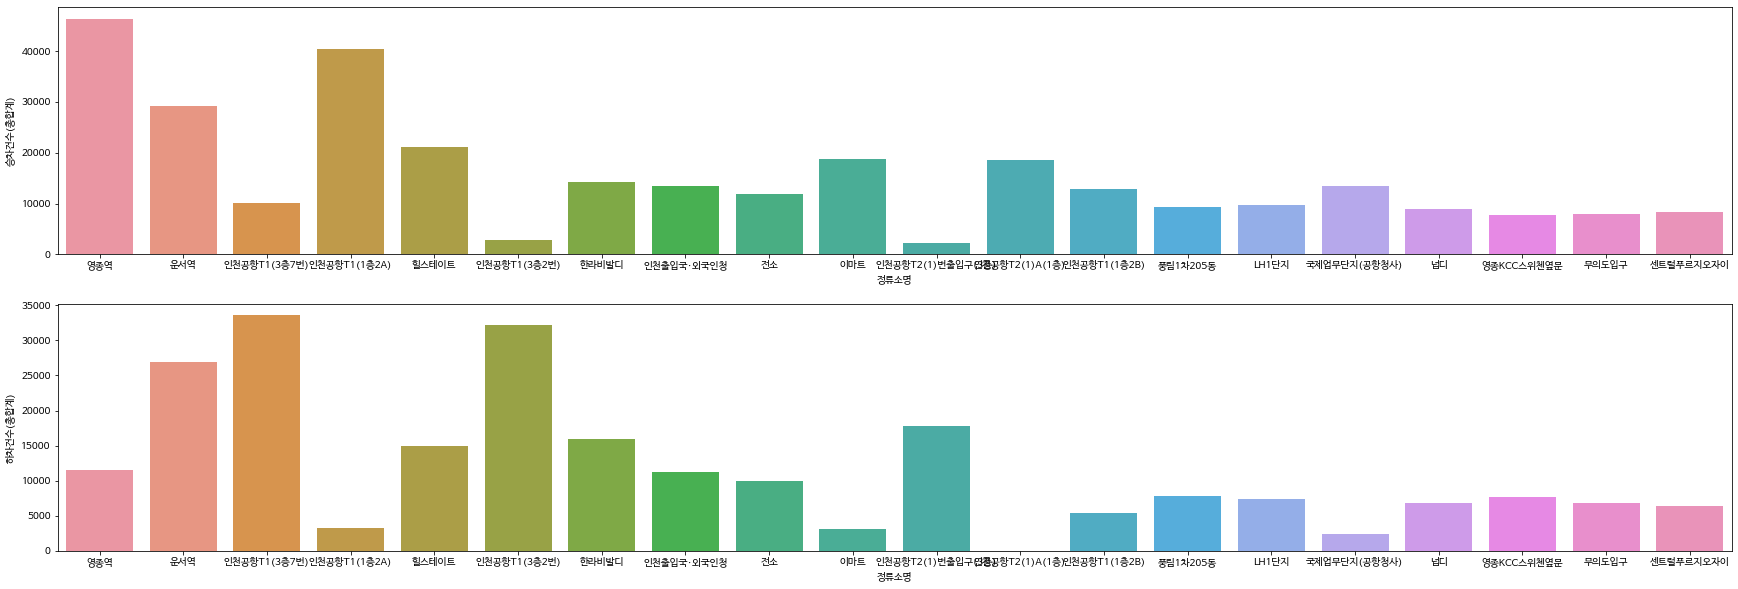

In [ ]:
col_n = 1
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))
data= bus_yj_.sort_values('승하차건수(총합계)', ascending=False)[:20]

col = ["승차건수(총합계)","하차건수(총합계)"]
for i,col in enumerate(data[col]): 
  sns.barplot(x=data["정류소명"], y=data[col], ax=ax[int(i)])

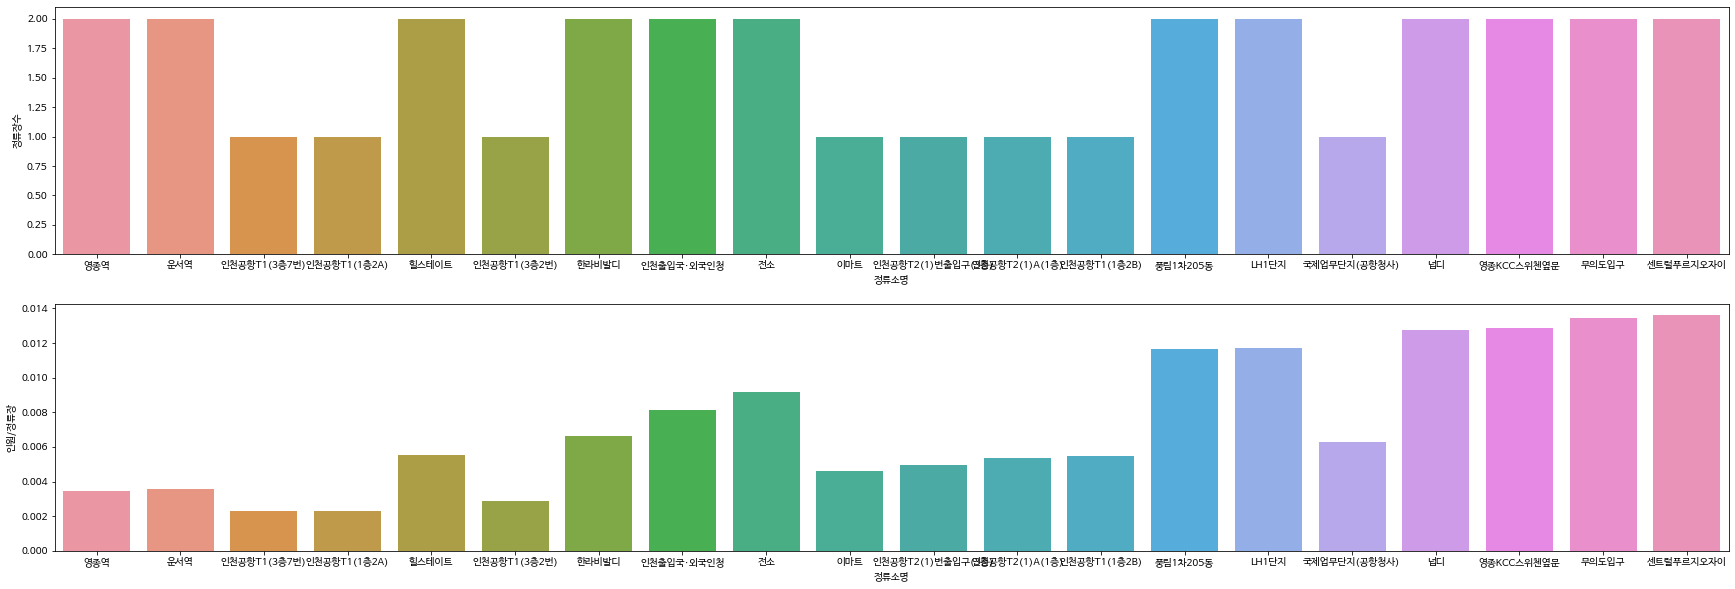

In [ ]:
col_n = 1
row_n = 2
fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(30,row_n*5))
data= bus_yj_.sort_values('승하차건수(총합계)', ascending=False)[:20]

col = ["정류장수","인원/정류장"]
for i,col in enumerate(data[col]): 
  sns.barplot(x=data["정류소명"], y=data[col], ax=ax[int(i)])

In [ ]:
sss.sort_values("인원/정류장", ascending = True).head(20)

,정류소명,승차건수(총합계),하차건수(총합계),정류장수,승하차건수(총합계),인원/정류장
175,인천공항T1(3층7번),10154,33549,1,43703,0.002288
169,인천공항T1(1층2A),40354,3260,1,43614,0.002293
173,인천공항T1(3층2번),2724,32258,1,34982,0.002859
117,영종역,46354,11491,2,57845,0.003458
157,운서역,29284,26926,2,56210,0.003558
166,이마트,18710,3045,1,21755,0.004597
178,인천공항T2(1)번출입구(3층),2216,17860,1,20076,0.004981
177,인천공항T2(1)A(1층),18628,35,1,18663,0.005358
170,인천공항T1(1층2B),12959,5358,1,18317,0.005459
246,힐스테이트,21120,14970,2,36090,0.005542


In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')